In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
plt.rcParams['figure.figsize'] = (24,6)

In [12]:
df = pd.read_csv('results/scores.csv')
df = df.dropna()

In [13]:
df

,cycle,task,method,instances,features,classes,accuracy,f1,optimization_time,prediction_time,no_features,best_trial
0,0,data/standardized/c_votes.csv,Baseline,435,16,2,0.923664,0.920278,0.000000,0.111494,16.0,0
3,0,data/standardized/c_votes.csv,Tree Based Filter,435,16,2,0.938931,0.936222,0.108406,0.109765,8.0,0
4,0,data/standardized/c_votes.csv,Tree Based Weighting,435,16,2,0.946565,0.944007,0.108406,0.112841,8.0,0
5,0,data/standardized/c_votes.csv,L1 Filter,435,16,2,0.954198,0.952167,0.003224,0.109295,2.0,0
6,0,data/standardized/c_votes.csv,ReliefF,435,16,2,0.938931,0.936623,0.018257,0.110193,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4012,15,data/standardized/c_iris.csv,Forward Selection,150,4,3,0.933333,0.931034,0.851077,0.106959,1.0,0
4013,15,data/standardized/c_iris.csv,Backwards Selection,150,4,3,0.933333,0.933303,0.745988,0.107213,3.0,0
4014,15,data/standardized/c_iris.csv,Stepwise Selection,150,4,3,0.911111,0.907051,0.851422,0.107133,2.0,0
4015,15,data/standardized/c_iris.csv,Bayesian Selection,150,4,3,0.933333,0.930705,9.038992,0.107451,1.0,0


In [18]:
df[(df.method=='Baseline') | (df.method=='Bayesian Selection') | (df.method=='Bayesian Weighting')].accuracy.value_counts()

0.593750    17
0.977778    16
0.944444    16
0.777778    15
0.955556    12
            ..
0.877660     1
0.969679     1
0.707692     1
0.820755     1
0.536036     1
Name: accuracy, Length: 322, dtype: int64

In [17]:
df[df.method=='Baseline'].groupby(['cycle','task','method']).mean()

instances  features  \
cycle task                                  method                          
0     data/standardized/c_australian.csv    Baseline        690        14   
      data/standardized/c_balance-scale.csv Baseline        625         4   
      data/standardized/c_breast-tissue.csv Baseline        106         9   
      data/standardized/c_breastcancer.csv  Baseline        569        30   
      data/standardized/c_car.csv           Baseline       1728        21   
...                                                         ...       ...   
15    data/standardized/c_iris.csv          Baseline        150         4   
      data/standardized/c_pi-diabetes.csv   Baseline        768         8   
      data/standardized/c_votes.csv         Baseline        435        16   
      data/standardized/c_wine.csv          Baseline        178        13   
      data/standardized/c_yeast.csv         Baseline       1479         8   

                                                      classes  accuracy  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline        2  0.865385   
      data/standardized/c_balance-scale.csv Baseline        3  0.882979   
      data/standardized/c_breast-tissue.csv Baseline        6  0.593750   
      data/standardized/c_breastcancer.csv  Baseline        2  0.970760   
      data/standardized/c_car.csv           Baseline        4  0.842004   
...                                                       ...       ...   
15    data/standardized/c_iris.csv          Baseline        3  0.955556   
      data/standardized/c_pi-diabetes.csv   Baseline        2  0.744589   
      data/standardized/c_votes.csv         Baseline        2  0.946565   
      data/standardized/c_wine.csv          Baseline        3  0.962963   
      data/standardized/c_yeast.csv         Baseline       10  0.610360   

                                                            f1  \
cycle task                                  method               
0     data/standardized/c_australian.csv    Baseline  0.863248   
      data/standardized/c_balance-scale.csv Baseline  0.616503   
      data/standardized/c_breast-tissue.csv Baseline  0.527376   
      data/standardized/c_breastcancer.csv  Baseline  0.968259   
      data/standardized/c_car.csv           Baseline  0.495712   
...                                                        ...   
15    data/standardized/c_iris.csv          Baseline  0.953968   
      data/standardized/c_pi-diabetes.csv   Baseline  0.701230   
      data/standardized/c_votes.csv         Baseline  0.942200   
      data/standardized/c_wine.csv          Baseline  0.961623   
      data/standardized/c_yeast.csv         Baseline  0.457164   

                                                      optimization_time  \
cycle task                                  method                        
0     data/standardized/c_australian.csv    Baseline       2.384186e-07   
      data/standardized/c_balance-scale.csv Baseline       2.384186e-07   
      data/standardized/c_breast-tissue.csv Baseline       0.000000e+00   
      data/standardized/c_breastcancer.csv  Baseline       0.000000e+00   
      data/standardized/c_car.csv           Baseline       2.384186e-07   
...                                                                 ...   
15    data/standardized/c_iris.csv          Baseline       2.384186e-07   
      data/standardized/c_pi-diabetes.csv   Baseline       2.384186e-07   
      data/standardized/c_votes.csv         Baseline       2.384186e-07   
      data/standardized/c_wine.csv          Baseline       2.384186e-07   
      data/standardized/c_yeast.csv         Baseline       0.000000e+00   

                                                      prediction_time  \
cycle task                                  method                      
0     data/standardized/c_australian.csv    Baseline         0.111516   
      data/standardize

In [16]:
for i, task in enumerate(df.task.unique()):
    plt.scatter([i - 0.2 for _ in range(10)], df[(df.task == task) & (df.method=='baseline')].accuracy, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(10)], df[(df.task == task) & (df.method=='bayesselection')].accuracy, c='C1', alpha=0.5)
    plt.scatter([i + 0.2 for _ in range(10)], df[(df.task == task) & (df.method=='bayeswweighting')].accuracy, c='C6', alpha=0.5)
    plt.scatter(i - 0.2, df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), c='C3')
    plt.scatter(i, df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean(), c='C3')
    plt.scatter(i + 0.2, df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean(), c='C3')

ValueError: x and y must be the same size

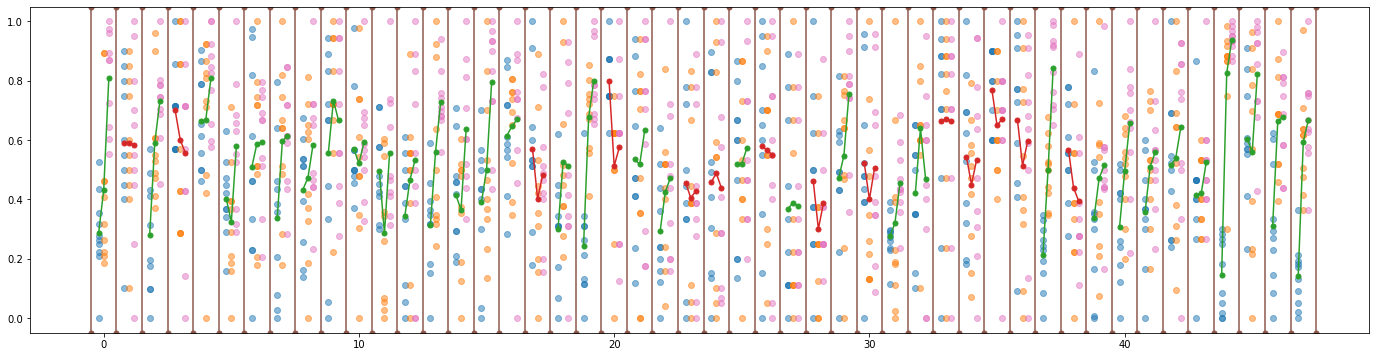

In [35]:
plt.axvline(-0.5, color='C5', marker = 'o', markersize=5)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()
    lower = df[(df.task == task) & ((df.method=='baseline') | (df.method=='bayesselection') | (df.method=='bayeswweighting'))].accuracy.min()
    higher = df[(df.task == task) & ((df.method=='baseline') | (df.method=='bayesselection') | (df.method=='bayeswweighting'))].accuracy.max()
    delta = higher - lower
    plt.scatter([i-0.2 for _ in range(10)], (df[(df.task == task) & (df.method=='baseline')].accuracy-lower)/delta, c='C0', alpha=0.5)
    plt.scatter([i for _ in range(10)], (df[(df.task == task) & (df.method=='bayesselection')].accuracy-lower)/delta, c='C1', alpha=0.5)
    plt.scatter([i+0.2 for _ in range(10)], (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy-lower)/delta, c='C6', alpha=0.5)
    if b > a:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()-lower)/delta], c='C2', marker = 'o', markersize=5)
    else:
        plt.plot([i-0.2, i, i+0.2], [(df[(df.task == task) & (df.method=='baseline')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayesselection')].accuracy.mean()-lower)/delta, (df[(df.task == task) & (df.method=='bayeswweighting')].accuracy.mean()-lower)/delta], c='C3', marker = 'o', markersize=5)
    plt.axvline(i+0.5, color='C5', marker = 'o', markersize=5)

In [19]:
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    if a > b + 0.01:
        print(task, a, b, a > b)

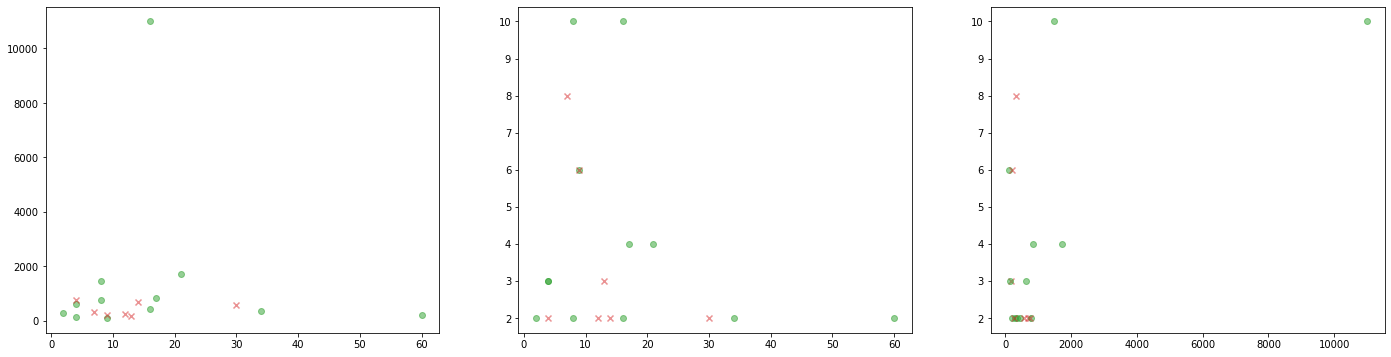

In [20]:
plt.subplot(1,3,1)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, ninstances, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, ninstances, color = 'C2', alpha=0.5)
plt.subplot(1,3,2)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(nfeatures, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(nfeatures, nclasses, color = 'C2', alpha=0.5)
plt.subplot(1,3,3)
for i, task in enumerate(df.task.unique()):
    a, b = df[(df.task == task) & (df.method=='Baseline')].accuracy.mean(), df[(df.task == task) & (df.method=='Bayesian Weighting')].accuracy.mean()
    nfeatures, ninstances, nclasses = df[(df.task == task)].iloc[0].features, df[(df.task == task)].iloc[0].instances, df[(df.task == task)].iloc[0].classes
    if a > b:
        plt.scatter(ninstances, nclasses, color = 'C3', marker='x', alpha=0.5)
    else:
        plt.scatter(ninstances, nclasses, color = 'C2', alpha=0.5)

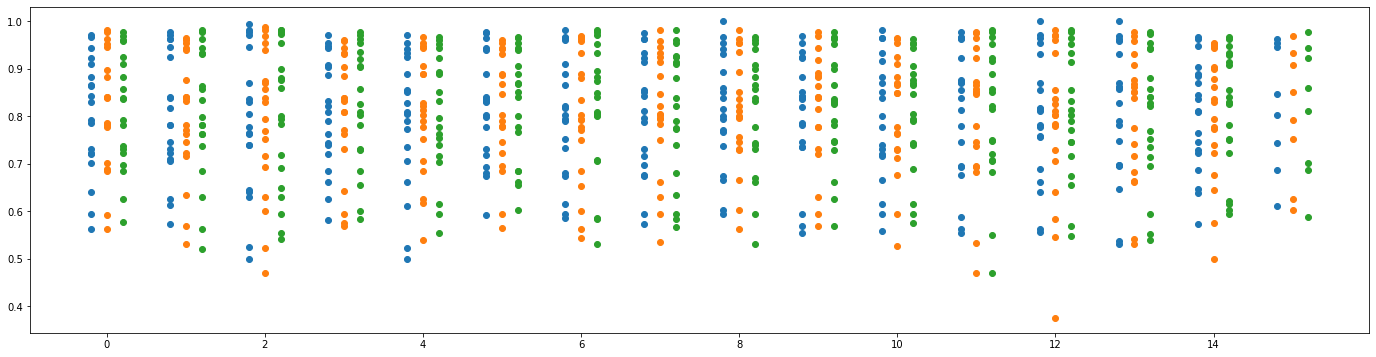

In [21]:
plt.scatter(df[df.method=='Baseline'].cycle - 0.2, df[df.method=='Baseline'].accuracy)
plt.scatter(df[df.method=='Bayesian Selection'].cycle, df[df.method=='Bayesian Selection'].accuracy)
plt.scatter(df[df.method=='Bayesian Weighting'].cycle + 0.2, df[df.method=='Bayesian Weighting'].accuracy)

In [22]:
for method in df.method.unique():
    print(method.ljust(30), df[df.method==method].accuracy.mean(), df[df.method==method].f1.mean())

Baseline                       0.8022927421912126 0.7124666339307829
Tree Based Filter              0.758582256671501 0.6555709755296475
Tree Based Weighting           0.7699108659659967 0.6719274642161558
L1 Filter                      0.7971219263922776 0.7072112534914128
ReliefF                        0.7858134031183676 0.6953864332317166
ReliefF Weighting              0.7692802500712181 0.6811880608008246
Forward Selection              0.7753327904739735 0.667579784604792
Backwards Selection            0.803292983025604 0.7251824105745954
Stepwise Selection             0.7999280903115291 0.7175380322451252
Bayesian Selection             0.8033986702606061 0.7153526593803973
Bayesian Weighting             0.8089452148644788 0.7315070797363024
Intercorrelation Filter        0.8313277112542555 0.7670745943857465
Correlation Weighting          0.8283030420105391 0.7608022799901617


In [23]:
ndf = df[df.features < 20]
for method in ndf.method.unique():
    print(method.ljust(30), ndf[ndf.method==method].accuracy.mean(), ndf[ndf.method==method].f1.mean())

Baseline                       0.7957840495871484 0.7133227981559824
Tree Based Filter              0.7515866551707684 0.6613783974319934
Tree Based Weighting           0.7599313486370999 0.6683207087906998
L1 Filter                      0.7832970414233206 0.6912963521533377
ReliefF                        0.7696516978335123 0.680789585204196
ReliefF Weighting              0.7471474037766216 0.6568706654662606
Forward Selection              0.7713841844477269 0.6687508535330389
Backwards Selection            0.7902574390597296 0.7153576624419362
Stepwise Selection             0.7877154775935583 0.7083759690305839
Bayesian Selection             0.7900024747680829 0.6993667299680577
Bayesian Weighting             0.7942446215437473 0.7099635294338333
Intercorrelation Filter        0.8256484924981166 0.7485311116284235
Correlation Weighting          0.8205749976548539 0.7377776910650329
